## Install extra R packages

In [ ]:
# Code based on factor analysis pipeline from Gagne et al. 2019

In [ ]:
packageurl <- 'https://cran.r-project.org/src/contrib/Archive/mnormt/mnormt_1.5-5.tar.gz'
install.packages(packageurl,repos=NULL, type="source")

In [ ]:
packageurl <- 'https://cran.r-project.org/src/contrib/Archive/psych/psych_1.8.12.tar.gz'
install.packages(packageurl,repos=NULL, type="source")

In [ ]:
sessionInfo()
packageVersion('psych')

In [ ]:
install.packages('polycor')
packageVersion('polycor') # should be ‘0.7.10’
packageVersion('mvtnorm') # should be ‘1.1.2’


install.packages('pbivnorm')
packageVersion('pbivnorm') # should be ‘0.6.0’

In [ ]:
packageurl <- 'https://cran.r-project.org/src/contrib/Archive/lavaan/lavaan_0.6-5.tar.gz'
install.packages(packageurl,repos=NULL, type="source")

In [ ]:
packageurl <- 'https://cran.r-project.org/src/contrib/Archive/nFactors/nFactors_2.3.3.1.tar.gz'
install.packages(packageurl,repos=NULL, type="source")

In [ ]:
packageurl = 'https://cran.r-project.org/src/contrib/Archive/GPArotation/GPArotation_2014.11-1.tar.gz'
install.packages(packageurl,repos=NULL, type="source")
packageVersion('GPArotation') # should be ‘2014.11.1’

In [ ]:
packageurl = 'https://cran.r-project.org/src/contrib/Archive/bayestestR/bayestestR_0.10.5.tar.gz'
install.packages(packageurl,repos=NULL, type="source")
packageVersion('bayestestR') # should be ‘0.10.5’

In [ ]:
packageurl <- 'https://cran.r-project.org/src/contrib/Archive/parameters/parameters_0.10.1.tar.gz'
install.packages(packageurl,repos=NULL, type="source")

In [1]:
# load R packages 
options(warn=-1)
library(psych)
library(GPArotation)
library(nFactors)
library(polycor)
library(lavaan)
#library("parameters")

Loading required package: MASS
Loading required package: boot

Attaching package: ‘boot’

The following object is masked from ‘package:psych’:

    logit

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:boot’:

    melanoma


Attaching package: ‘nFactors’

The following object is masked from ‘package:lattice’:

    parallel


Attaching package: ‘polycor’

The following object is masked from ‘package:psych’:

    polyserial

This is lavaan 0.6-5
lavaan is BETA software! Please report any bugs.

Attaching package: ‘lavaan’

The following object is masked from ‘package:psych’:

    cor2cov



## Load Data From Predator Task

In [4]:
# Load my data

Q_data_sp_raw = (read.csv('./data/factor_analysis/questionnaires_itemdata_forFA.csv', sep=';'))
Q_data_sp_df = data.frame(Q_data_sp_raw)

# remove nan values
Q_data_sp_df = na.omit(Q_data_sp_df)

# remove extra columns
Q_data_df_pure = subset(Q_data_sp_df,select = -c(REF,X))

nrow(Q_data_df_pure)
ncol(Q_data_df_pure)
head(Q_data_df_pure)

[1] 758

[1] 164

AI01_01,AI01_02,AI01_03,AI01_04,AI01_05,AI01_06,AI01_07,AI01_08,AI01_09,AI01_10,...,PW01_07,PW01_08,PW01_09,PW01_10,PW01_11,PW01_12,PW01_13,PW01_14,PW01_15,PW01_16
3,3,1,2,3,3,2,3,2,4,...,2,4,3,5,5,2,3,4,2,3
3,3,2,1,3,1,1,4,1,2,...,4,3,3,5,5,5,4,4,4,3
2,2,2,2,2,2,2,2,1,2,...,3,5,2,5,5,4,3,3,3,3
2,2,1,1,2,1,1,2,1,2,...,4,5,3,5,5,5,4,5,3,3
1,1,2,1,2,2,1,1,1,2,...,1,2,3,5,4,4,2,1,1,1
2,2,1,1,2,1,1,2,1,1,...,2,3,3,5,2,1,2,1,1,2


The determinant of the smoothed correlation was zero.
This means the objective function is not defined.
Chi square is based upon observed residuals.
The determinant of the smoothed correlation was zero.
This means the objective function is not defined for the null model either.
The Chi square is thus based upon observed correlations.


Parallel analysis suggests that the number of factors =  48  and the number of components =  24 


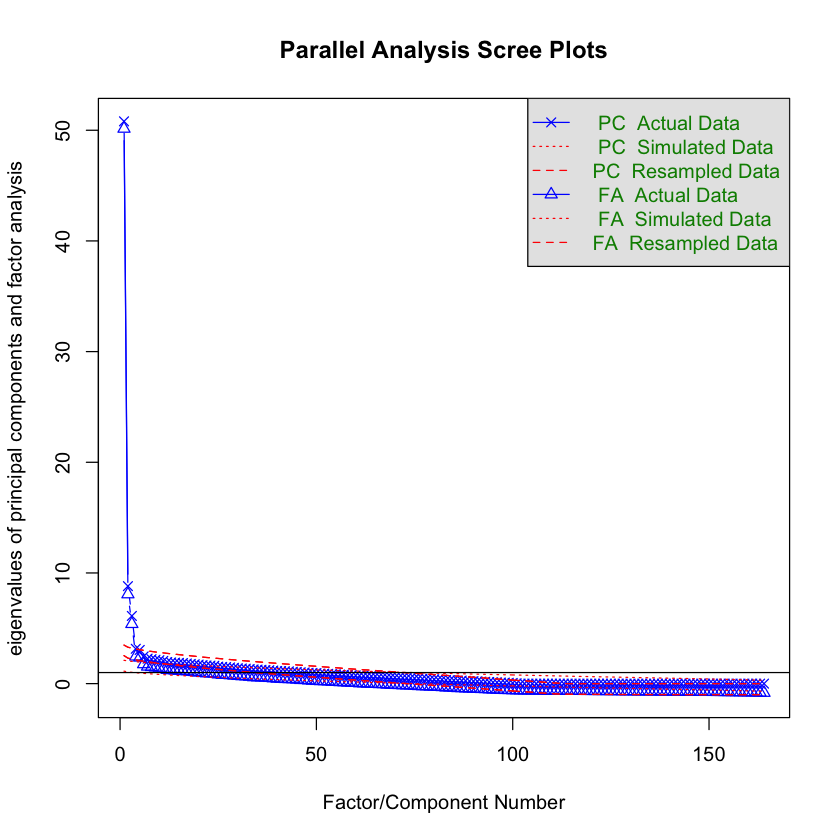

In [5]:
# Parallel Analysis resampling and random normal
options(warn=-1)
ap2<-fa.parallel(Q_data_df_pure,cor="poly",sim=FALSE, global=FALSE)

## Factor Analysis

The determinant of the smoothed correlation was zero.
This means the objective function is not defined.
Chi square is based upon observed residuals.
The determinant of the smoothed correlation was zero.
This means the objective function is not defined for the null model either.
The Chi square is thus based upon observed correlations.

Three factors are required for identification -- general factor loadings set to be equal. 
Proceed with caution. 
Think about redoing the analysis with alternative values of the 'option' setting.

The determinant of the smoothed correlation was zero.
This means the objective function is not defined.
Chi square is based upon observed residuals.
The determinant of the smoothed correlation was zero.
This means the objective function is not defined for the null model either.
The Chi square is thus based upon observed correlations.
The determinant of the smoothed correlation was zero.
This means the objective function is not defined.
Chi square is based upon o

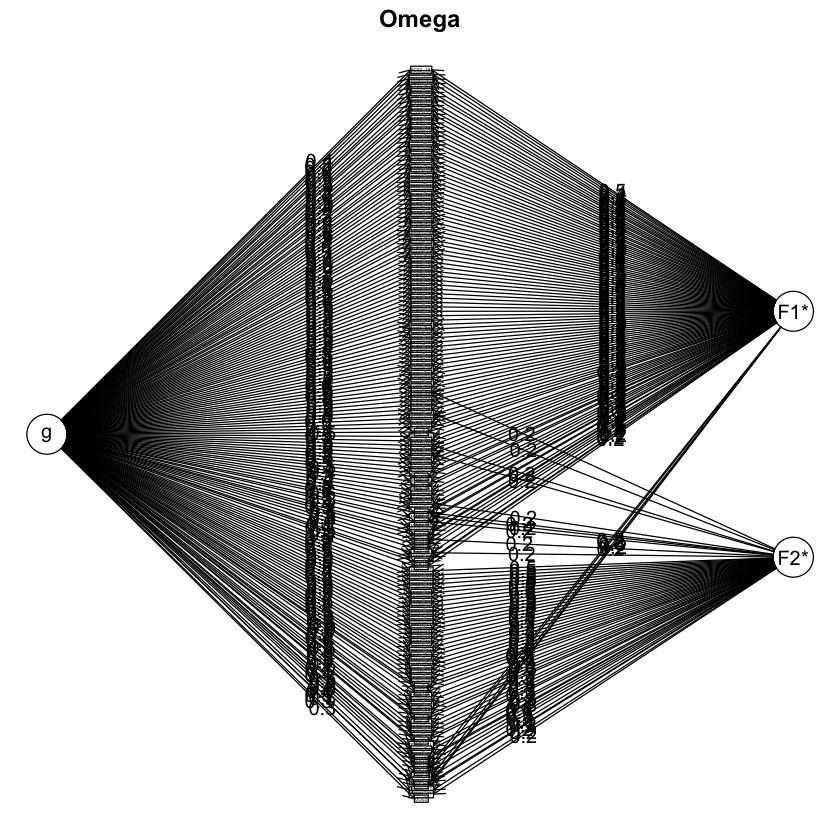

In [6]:
# Bifactor analysis
options(warn=-1)
results_predator.cdm <-omega(Q_data_df_pure,
                     nfactors = 2,
                     poly = TRUE,
                     flip = FALSE,
                     rotate='oblimin',
                     oblique.scores=False)

In [7]:
# Threshold factor loadings
SL_pred.cdm<-data.frame(results_predator.cdm$schmid$sl)
SL_pred.cdm$g<-round(as.numeric(as.character(SL_pred.cdm$g)),2)
SL_pred.cdm$F1.<-round(as.numeric(as.character(SL_pred.cdm$F1.)),2)
SL_pred.cdm$F2.<-round(as.numeric(as.character(SL_pred.cdm$F2.)),2)

# threshold specific factors 
SL_pred.cdm$F1.[abs(SL_pred.cdm$F1.)<0.20]=0
SL_pred.cdm$F2.[abs(SL_pred.cdm$F2.)<0.20]=0

In [8]:
# View data
results_predator.cdm
results_predator.cdm$schmid$sl

Omega 
Call: omega(m = Q_data_df_pure, nfactors = 2, poly = TRUE, flip = FALSE, 
    rotate = "oblimin", oblique.scores = False)
Alpha:                 0.99 
G.6:                   1 
Omega Hierarchical:    0.69 
Omega H asymptotic:    0.7 
Omega Total            0.99 

Schmid Leiman Factor loadings greater than  0.2 
           g   F1*   F2*   h2   u2   p2
AI01_01 0.51        0.29 0.38 0.62 0.70
AI01_02 0.53        0.31 0.41 0.59 0.69
AI01_03 0.45  0.33       0.32 0.68 0.64
AI01_04 0.46  0.34       0.34 0.66 0.64
AI01_05 0.50        0.33 0.37 0.63 0.67
AI01_06 0.43  0.26       0.26 0.74 0.68
AI01_07 0.46  0.32       0.32 0.68 0.66
AI01_08 0.56        0.48 0.55 0.45 0.58
AI01_09 0.40  0.34       0.27 0.73 0.58
AI01_10 0.53        0.37 0.43 0.57 0.66
AI01_11 0.55        0.44 0.50 0.50 0.61
AI01_12 0.46  0.34       0.34 0.66 0.64
AI01_13 0.41  0.40       0.32 0.68 0.51
AI01_14 0.44  0.34       0.31 0.69 0.62
AI01_15 0.54        0.36 0.43 0.57 0.66
AI01_16 0.55        0.46 0.52 0.48 0.59


,g,F1*,F2*,h2,u2,p2
AI01_01,0.5136977,0.170867274,0.29074595,0.3776142,0.6223858,0.6988226
AI01_02,0.5349873,0.168698724,0.31204551,0.4120431,0.5879569,0.6946153
AI01_03,0.4511116,0.331797001,0.07357578,0.3190043,0.6809957,0.6379276
AI01_04,0.4641810,0.341832180,0.07528488,0.3379810,0.6620190,0.6375032
AI01_05,0.4952367,0.117950010,0.32707398,0.3661490,0.6338510,0.6698349
AI01_06,0.4254120,0.264000265,0.11827862,0.2646613,0.7353387,0.6837997
AI01_07,0.4592705,0.317376237,0.09532821,0.3207445,0.6792555,0.6576243
AI01_08,0.5631809,0.029508107,0.47657115,0.5451635,0.4548365,0.5817938
AI01_09,0.3993888,0.337486315,0.02140796,0.2738668,0.7261332,0.5824418
AI01_10,0.5313540,0.111998535,0.36548076,0.4284569,0.5715431,0.6589625


In [9]:
# save data
write.csv(SL_pred.cdm,'./data/factor_analysis/main_FA_factorloadings.csv')

In [10]:
# save unthresholded loadings
SL_pred_uncorr.cdm<-data.frame(results_predator.cdm$schmid$sl)
SL_pred_uncorr.cdm
write.csv(SL_pred_uncorr.cdm,'./data/factor_analysis/main_FA_factorloadings_unthresholded.csv')

,g,F1.,F2.,h2,u2,p2
AI01_01,0.5136977,0.170867274,0.29074595,0.3776142,0.6223858,0.6988226
AI01_02,0.5349873,0.168698724,0.31204551,0.4120431,0.5879569,0.6946153
AI01_03,0.4511116,0.331797001,0.07357578,0.3190043,0.6809957,0.6379276
AI01_04,0.4641810,0.341832180,0.07528488,0.3379810,0.6620190,0.6375032
AI01_05,0.4952367,0.117950010,0.32707398,0.3661490,0.6338510,0.6698349
AI01_06,0.4254120,0.264000265,0.11827862,0.2646613,0.7353387,0.6837997
AI01_07,0.4592705,0.317376237,0.09532821,0.3207445,0.6792555,0.6576243
AI01_08,0.5631809,0.029508107,0.47657115,0.5451635,0.4548365,0.5817938
AI01_09,0.3993888,0.337486315,0.02140796,0.2738668,0.7261332,0.5824418
AI01_10,0.5313540,0.111998535,0.36548076,0.4284569,0.5715431,0.6589625


## Calculating factor scores

In [ ]:
### Factor score function 
#- taken from 'psych packages'

In [11]:
"factor.scores" <- function(x,f,Phi=NULL,method=c("Thurstone","tenBerge","Anderson","Bartlett","Harman","components"),rho=NULL,impute="none") {
#the normal case is f is the structure matrix and Phi is not specified
#Note that the Grice formulas distinguish between Pattern and Structure matrices
#I need to confirm that I am doing this

    if(length(method) > 1) method <- "tenBerge"   #the default
    if(method=="regression") method <- "Thurstone"
    if(method=="tenberge") method <- "tenBerge"
    if(length(class(f)) > 1) { if(inherits(f[2] ,"irt.fa" )) f <- f$fa  }
    
     if(!is.matrix(f)) {Phi <- f$Phi
     f <- loadings(f)
      if(ncol(f)==1) {method <- "Thurstone"}
      }
     nf <- dim(f)[2]
      if(is.null(Phi)) Phi <- diag(1,nf,nf)
     if(dim(x)[1] == dim(f)[1]) {r <- as.matrix(x)
         square <- TRUE} else { 
          square <- FALSE
         if(!is.null(rho)) {r <- rho } else {
          r <- cor(x,use="pairwise") #find the correlation matrix from the data
      }}
      
      S <- f %*% Phi   #the Structure matrix 
   switch(method,   
    "Thurstone" = { w <- try(solve(r,S),silent=TRUE )  #these are the factor weights (see Grice eq. 5)
     	if(inherits(w,"try-error")) {message("In factor.scores, the correlation matrix is singular, an approximation is used")
               r <- cor.smooth(r)}
        
      w <- try(solve(r,S),silent=TRUE)
      if(inherits(w,"try-error")) {message("I was unable to calculate the factor score weights, factor loadings used instead")
               w <- f}
      colnames(w) <- colnames(f)
      rownames(w) <- rownames(f)
       }, 
      
  "tenBerge" = { #Following Grice equation 8 to estimate scores for oblique solutions (with a correction to the second line where r should r.inv
        L <- f %*% matSqrt(Phi)
        r.5 <- invMatSqrt(r)
       
        r <- cor.smooth(r)
        inv.r <- try(solve(r),silent=TRUE)
        if(inherits(inv.r, as.character("try-error")))  {warning("The tenBerge based scoring could not invert the correlation matrix, regression scores found instead")
                                                      ev <- eigen(r)
      ev$values[ev$values < .Machine$double.eps] <- 100 * .Machine$double.eps
        r <- ev$vectors %*% diag(ev$values) %*% t(ev$vectors)
        diag(r)  <- 1
       w <- solve(r,f)}  else {
        C <- r.5 %*% L %*% invMatSqrt(t(L) %*% inv.r %*% L)    #note that this is the correct formula, per Grice personal communication
        w <- r.5 %*% C %*% matSqrt(Phi)}
        colnames(w) <- colnames(f)
        rownames(w) <- rownames(f)
        },

 
       
    "Harman" = { #Grice equation 10 -- 
     #   m <- t(f)  %*% f  #factor intercorrelations 
     m <- f %*% t(S)  #should be this  (the model matrix)  Revised August 31, 2017
     diag(m) <- 1  #Grice does not say this, but it is necessary to make it work!
       inv.m <- solve(m)
     #  w <- f %*%inv.m  
     w <- inv.m %*% f
       }, 
       
       
        
    "Anderson" =  { #scores for orthogonal factor solution will be orthogonal  Grice Eq 7 and 8
    I <- diag(1,nf,nf)
    h2 <-  diag( f %*% Phi %*% t(f))
    U2 <- 1 - h2
    inv.U2 <- diag(1/U2)
    w <- inv.U2 %*% f %*% invMatSqrt(t(f) %*% inv.U2 %*% r %*% inv.U2 %*% f)
    colnames(w) <- colnames(f)
    rownames(w) <- rownames(f)
    },
    
   "Bartlett" = {    #Grice eq 9  # f should be the pattern, not the structure 
    I <- diag(1,nf,nf)
    h2 <-  diag( f %*% Phi %*% t(f))
    U2 <- 1 - h2
    inv.U2 <- diag(1/U2)
    w <- inv.U2 %*% f %*% (solve(t(f) %*% inv.U2 %*% f))
    colnames(w) <- colnames(f)
    rownames(w) <- rownames(f)
    },
    "none" = {w <- NULL},
    
    "components" = {w <- try(solve(r,f),silent=TRUE )    #basically, just do the regression/Thurstone approach for components
                    w <- f }
    )
    
    
    #now find a few fit statistics
    if(is.null(w)) {results <- list(scores=NULL,weights=NULL)} else {
     R2 <- diag(t(w) %*% S)  #this had been   R2 <- diag(t(w) %*% f)   Corrected Sept 1, 2017
     if(any(R2 > 1) || (prod(!is.nan(R2)) <1) || (prod(R2) < 0) ) {#message("The matrix is probably singular -- Factor score estimate results are likely incorrect")
                      R2[abs(R2) > 1] <- NA
                      R2[R2 <= 0] <- NA
                     }
     #if ((max(R2,na.rm=TRUE) > (1 + .Machine$double.eps)) ) {message("The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.")}
      r.scores <- cov2cor(t(w) %*% r %*% w) #what actually is this?
     
    
  if(square) {  #that is, if given the correlation matrix
     class(w) <- NULL
     results <- list(scores=NULL,weights=w)
      results$r.scores <- r.scores 
   	  results$R2 <- R2   #this is the multiple R2 of the scores with the factors
     } else {
         missing <- rowSums(is.na(x))
    if(impute !="none") {
       x <- data.matrix(x)
        miss <- which(is.na(x),arr.ind=TRUE)
        if(impute=="mean") {
       		item.means <- colMeans(x,na.rm=TRUE)   #replace missing values with means
       		x[miss]<- item.means[miss[,2]]} else { 
       		item.med   <- apply(x,2,median,na.rm=TRUE) #replace missing with medians
        	x[miss]<- item.med[miss[,2]]}   #this only works if items is a matrix
     }
      

     if(method !="components") {scores <- x %*% w } else {  #standardize the data before doing the regression if using factors, 
        scores <- x %*% w}       # for components, the data have already been zero centered and, if appropriate, scaled
     results <- list(scores=scores,weights=w)
     results$r.scores <- r.scores
     results$missing <- missing 
   	  results$R2 <- R2   #this is the multiple R2 of the scores with the factors
     }
     }
   
     return(results) }
     #how to treat missing data?  see score.item
         
     
"matSqrt" <- function(x) {
   e <- eigen(x)
    e$values[e$values < 0] <- .Machine$double.eps
   sqrt.ev <- sqrt(e$values)   #need to put in a check here for postive semi definite
   result <- e$vectors %*% diag(sqrt.ev) %*% t(e$vectors)
   result}
   
   
"invMatSqrt" <- function(x) {
   e <- eigen(x)
   if(is.complex(e$values)) {warning("complex eigen values detected by invMatSqrt, results are suspect")
                 result <- x
      } else {
      
       e$values[e$values < .Machine$double.eps] <- 100 * .Machine$double.eps
   inv.sqrt.ev <- 1/sqrt(e$values)   #need to put in a check here for postive semi definite
   result <- e$vectors %*% diag(inv.sqrt.ev) %*% t(e$vectors) }
   result}

In [12]:
 # Scale data
Q_data_df_scaled_scale = scale(Q_data_df_pure)

In [13]:
# Get loadings for each item of questionnaire
L2.cdm = SL_pred.cdm[,c(1,2,3)]
Lmat2.cdm = as.matrix(L2.cdm)
head(Lmat2.cdm)

,g,F1.,F2.
AI01_01,0.51,0.00,0.29
AI01_02,0.53,0.00,0.31
AI01_03,0.45,0.33,0.00
AI01_04,0.46,0.34,0.00
AI01_05,0.50,0.00,0.33
AI01_06,0.43,0.26,0.00


In [14]:
# calculate factor scores
fscores<-factor.scores(Q_data_df_scaled_scale,
                       Lmat2.cdm,method ="Anderson",impute = 'mean')
head(fscores$scores)
fscores2.cdm<-fscores

g,F1.,F2.
-0.04965072,-0.8050172,1.4275408
0.28233019,-0.6933733,0.9339542
-0.20243096,-0.7114165,-0.5527339
-0.34637431,-0.5659499,-0.6963498
-1.48769832,-0.5309212,0.1323359
-1.07029725,-0.5222738,-1.0279883


In [15]:
# bind subject IDs to factor scores
factor_scores_subj = data.frame(fscores$scores)
factor_scores_subj['V1'] = Q_data_sp_df$REF

In [16]:
# save factor scores

write.csv(factor_scores_subj,'./data/factor_analysis/factor_scores_redone.csv')
factor_scores_subj

g,F1.,F2.,V1
-0.04965072,-0.80501718,1.42754082,SinglePredator_LessInstructions_63e590489911159364dcf70d
0.28233019,-0.69337333,0.93395416,SinglePredator_LessInstructions_5ea3325a58e7b70dd3026a42
-0.20243096,-0.71141652,-0.55273394,SinglePredator_LessInstructions_5e88dd7a0febe805d3a120b6
-0.34637431,-0.56594988,-0.69634977,SinglePredator_LessInstructions_63dad9e2dd58781d74bfa642
-1.48769832,-0.53092121,0.13233593,SinglePredator_LessInstructions_5eb41fcb3a7a1724207bbfd6
-1.07029725,-0.52227379,-1.02798833,SinglePredator_LessInstructions_610c59ee34cc312d7ca55e45
-0.71147937,0.42578252,-0.03922713,SinglePredator_LessInstructions_5fb70808c7c7bb1d76c2b9d4
-0.77215649,0.59743315,1.07288721,SinglePredator_LessInstructions_6538827212ccfc55c37f985d
0.16693256,0.19864871,-1.21527216,SinglePredator_LessInstructions_5fc8384d1bc5841b0e23dce6
1.08906313,0.21930665,0.14928392,SinglePredator_LessInstructions_6321d9c78e8e3c04f82a0ea0
